In [1]:
import stream as st
st.__version__

/Users/qrzhang/anaconda3/envs/stream/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


'1.0'

In [2]:
st.set_figure_params(dpi=100,style='white',figsize=[5.4,4.8],
                     rc={'image.cmap': 'viridis','lines.markersize':4})

### Read in data

In [3]:
adata=st.read(file_name='SCoPE2_GeneNames.h5ad',
              workdir='./result_stream_SCoPE2_MLLE_allGenes_0816')

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Saving results in: ./result_stream_SCoPE2_MLLE_allGenes_0816


In [4]:
adata.X = adata.X.toarray()

In [5]:
adata.X

array([[-0.34342456, -0.13379173,  0.12921445, ..., -0.0177372 ,
        -0.1299273 , -0.7857328 ],
       [-0.27356362, -0.13337049, -0.04686752, ..., -0.1092504 ,
         0.1264482 , -0.2061828 ],
       [-0.4545432 ,  0.31088418,  0.17339253, ..., -0.09870619,
         0.3567254 ,  0.1588498 ],
       ...,
       [ 0.03667745, -0.17861138,  0.15350403, ...,  0.00908208,
         0.0543325 ,  0.5151111 ],
       [ 0.16681248,  0.08523677, -0.12039816, ..., -0.1539329 ,
         0.09751768, -0.2859719 ],
       [ 0.10683481,  0.15978284, -0.15788642, ...,  0.2346705 ,
        -0.2987663 , -0.2912859 ]], dtype=float32)

In [6]:
adata.var_names_make_unique()

In [7]:
adata.var

,UniProt
SIK1B,A0A0B4J2F2
CSNKA2IP,A0A1B0GTH6
CCDC195,A0A1B0GUA6
SPEM3,A0A1B0GUW6
PVALEF,A0A1B0GWK0
...,...
CAPN6,Q9Y6Q1
CCDC61,Q9Y6R9
DUSP10,Q9Y6W6
MYO16,Q9Y6X6


### Calculate QC

In [8]:
#st.cal_qc(adata)
#st.plot_qc(adata,jitter=0.3,)

##### It is preprocessed data and there is no need to do filter and normalization again.

In [9]:
### filter
#st.filter_cells(adata,min_n_features= 100)
#st.filter_features(adata,min_n_cells = 5)

In [10]:
### Normalize gene expression based on library size  
#st.normalize(adata,method='lib_size')

### Logarithmize gene expression 
#st.log_transform(adata)

In [8]:
adata

AnnData object with n_obs × n_vars = 1018 × 2772
    obs: 'celltype', 'batch_digest', 'batch_sort', 'batch_chromatography', 'raw.file'
    var: 'UniProt'
    uns: 'workdir'

### Feature selection

##### There two ways to do feature selection, one is to select variable genes, another one is to select top principal componets. I have tried both two ways and they have pretty similar results.

2771 variable genes are selected


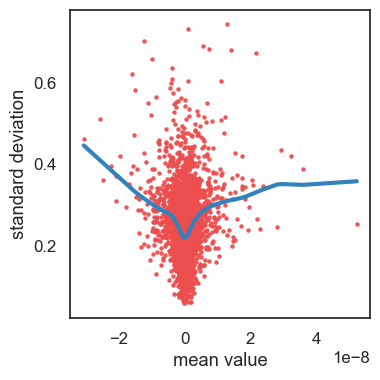

In [9]:
### Use percentile=0 to select all proteins
st.select_variable_genes(adata,loess_frac=0.5,percentile=0)

In [13]:
### Select top principal components using all genes
#st.select_top_principal_components(adata,n_pc=30,first_pc=True)

### Dimension Reduction

In [32]:
#st.dimension_reduction(adata,method='se',feature='var_genes',n_components=2,n_neighbors=15,n_jobs=4)

feature var_genes is being used ...
4 cpus are being used ...


In [14]:
st.dimension_reduction(adata,method='mlle',feature='var_genes',n_components=2,n_neighbors=15,n_jobs=4)

feature var_genes is being used ...
4 cpus are being used ...


In [12]:
#st.dimension_reduction(adata,method='pca',feature='var_genes',n_components=2,n_neighbors=15,n_jobs=4)

feature var_genes is being used ...
4 cpus are being used ...


In [ ]:
#st.dimension_reduction(adata,method='se',feature='top_pcs',n_neighbors=15, n_components=2)

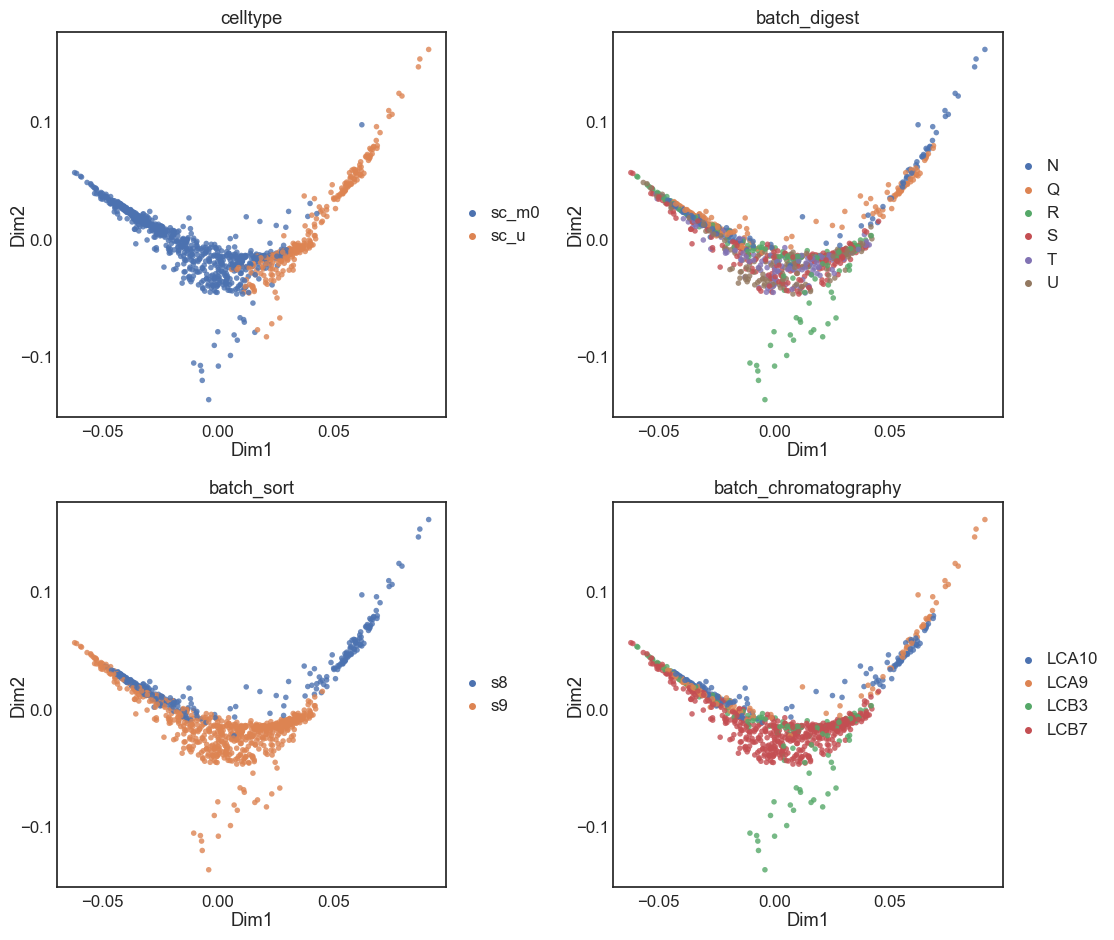

In [15]:
st.plot_dimension_reduction(adata,color=['celltype','batch_digest','batch_sort', 'batch_chromatography'],
                            n_components=2,show_graph=False,show_text=False, fig_ncol= 2)

### Trajectory Inference

In [20]:
st.seed_elastic_principal_graph(adata,n_clusters=3)

Seeding initial elastic principal graph...
Clustering...
K-Means clustering ...
The number of initial nodes is 3
Calculatng minimum spanning tree...
Number of initial branches: 1


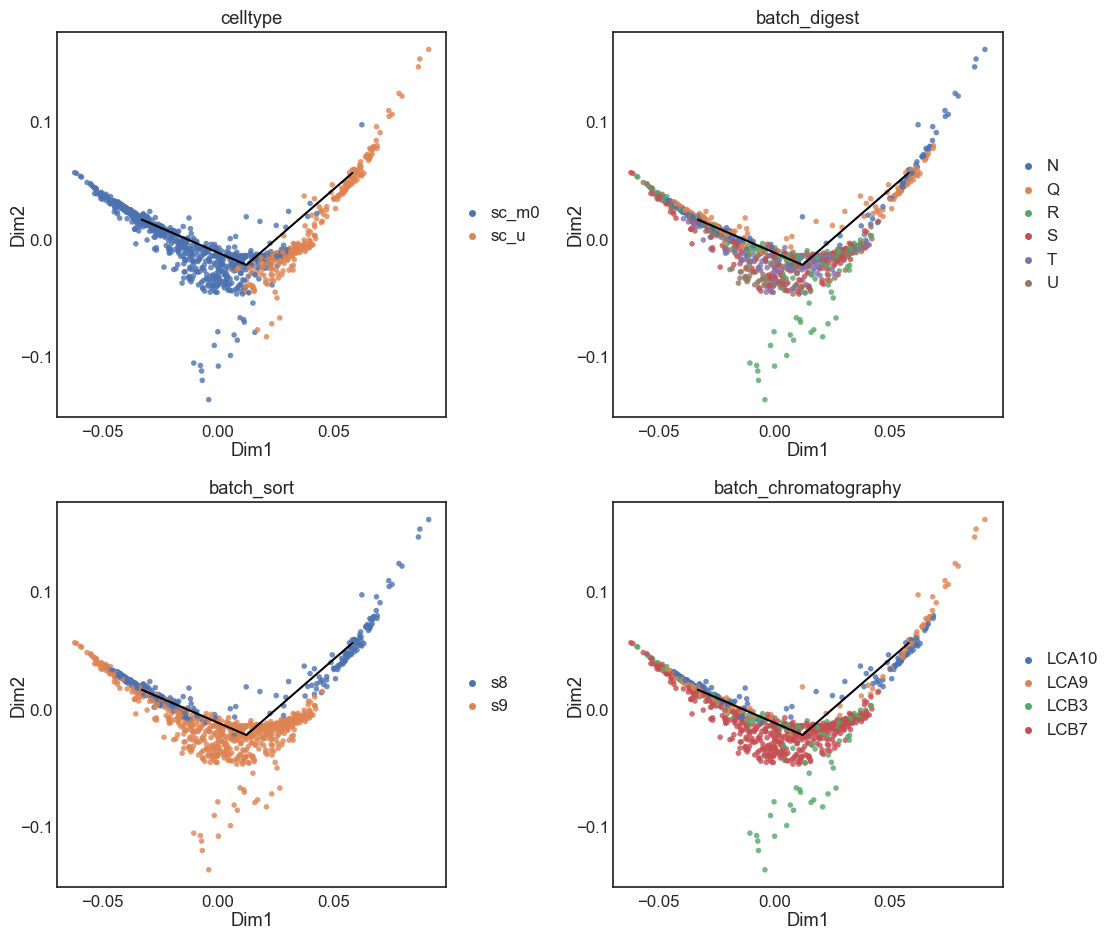

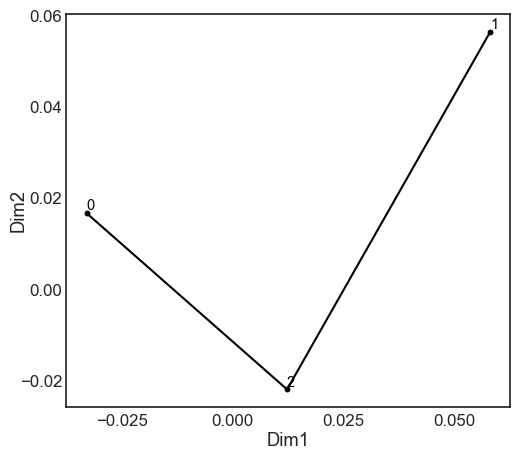

In [21]:
st.plot_dimension_reduction(adata,color=['celltype','batch_digest','batch_sort','batch_chromatography'],
                            n_components=2,show_graph=True,show_text=False, fig_ncol= 2)
st.plot_branches(adata,show_text=True)

In [22]:
#st.elastic_principal_graph(adata)
st.elastic_principal_graph(adata,epg_alpha=0.2,epg_mu=0.05,epg_lambda=0.1)

Learning elastic principal graph...
[1]
 "Constructing tree 1 of 1 / Subset 1 of 1"


[1]
 "Computing EPG with 50 nodes on 1018 points and 2 dimensions"


[1]
 "Using a single core"


Nodes = 
3
 
4
 
5
 
6
 
7
 
8
 
9
 
10
 
11
 
12
 
13
 
14
 
15
 
16
 
17
 
18
 
19
 
20
 
21
 
22
 
23
 
24
 
25
 
26
 
27
 
28
 
29
 
30
 
31
 
32
 
33
 
34
 
35
 
36
 
37
 
38
 
39
 
40
 
41
 
42
 
43
 
44
 
45
 
46
 
47
 
48
 
49
 


BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

0||50
	
0.0002235
	
50
	
49
	
48
	
0
	
0
	
0
	
0.0001169
	
0.0001153
	
0.9406
	
0.9413
	
0.0001033
	
3.407e-06
	
0.0001703
	
0.008517
	
0


6.803 sec elapsed

[[1]]



Number of branches after learning elastic principal graph: 1


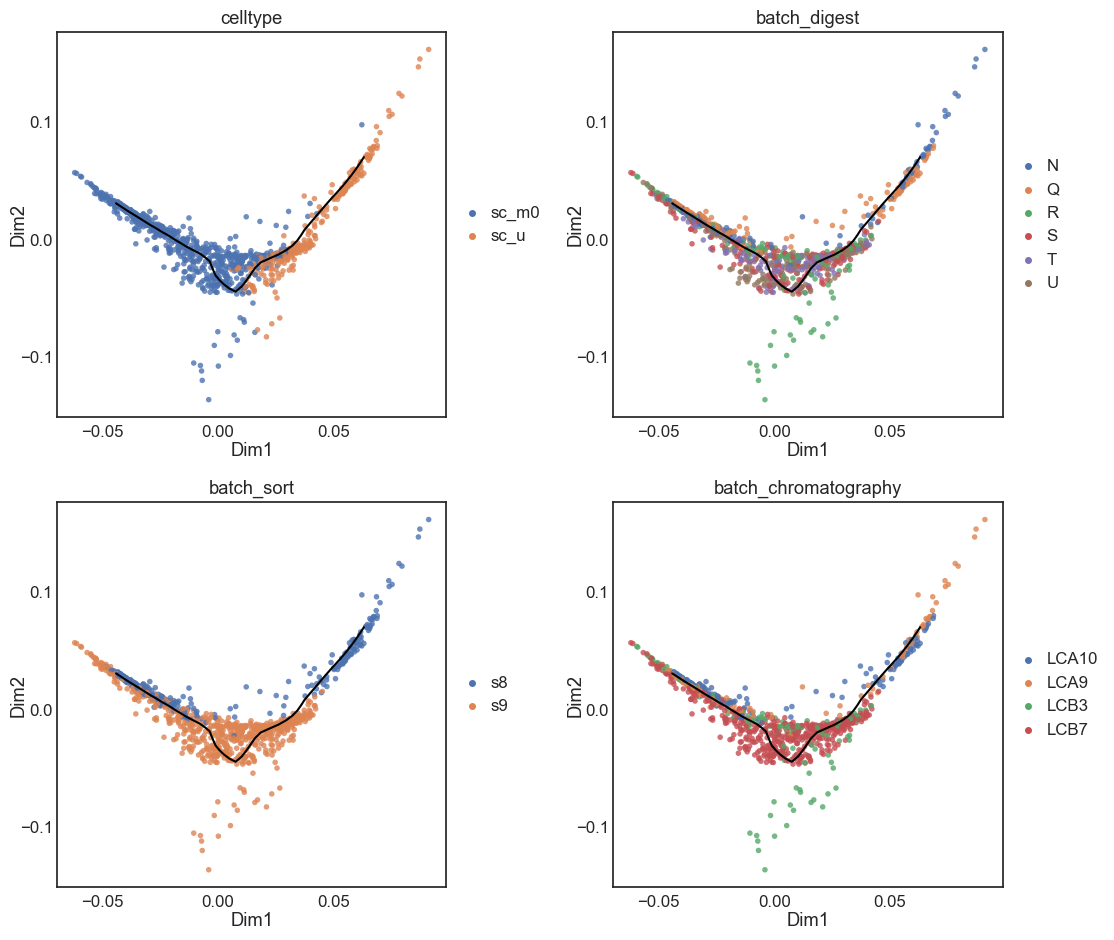

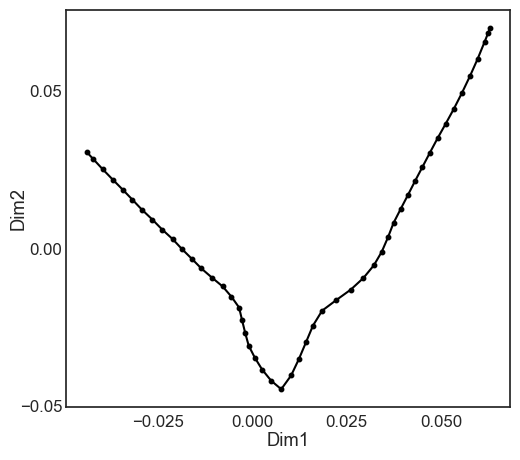

In [23]:
st.plot_dimension_reduction(adata,color=['celltype','batch_digest','batch_sort', 'batch_chromatography'],
                            n_components=2,show_graph=True,show_text=False, fig_ncol= 2)
st.plot_branches(adata,show_text=False)

Extending leaves with additional nodes ...
Number of branches after extending leaves: 1


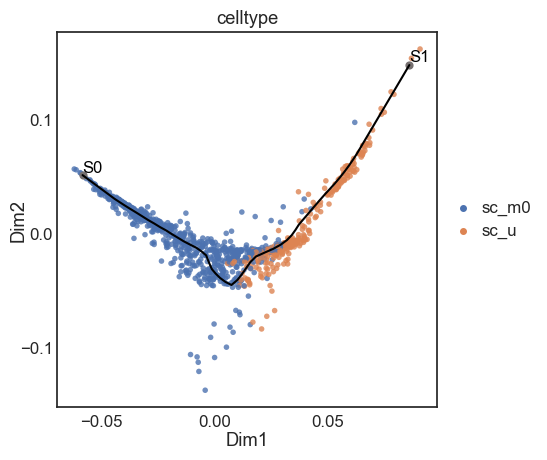

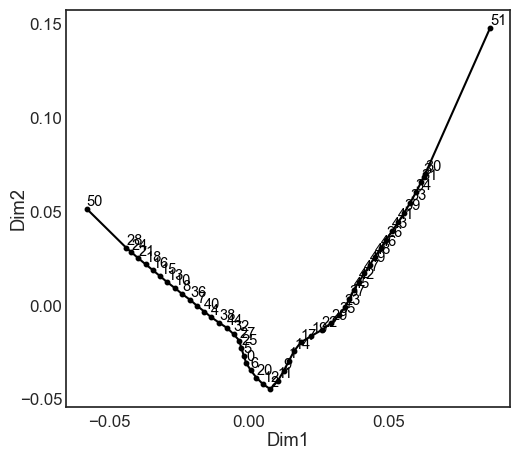

In [24]:
### Extend leaf branch to reach further cells 
st.extend_elastic_principal_graph(adata, epg_ext_mode='WeigthedCentroid',epg_ext_par=0.8)
st.plot_dimension_reduction(adata,color=['celltype'],n_components=2,show_graph=True,show_text=True)
st.plot_branches(adata,show_text=True)

### Trajectory Visulization

##### flat tree

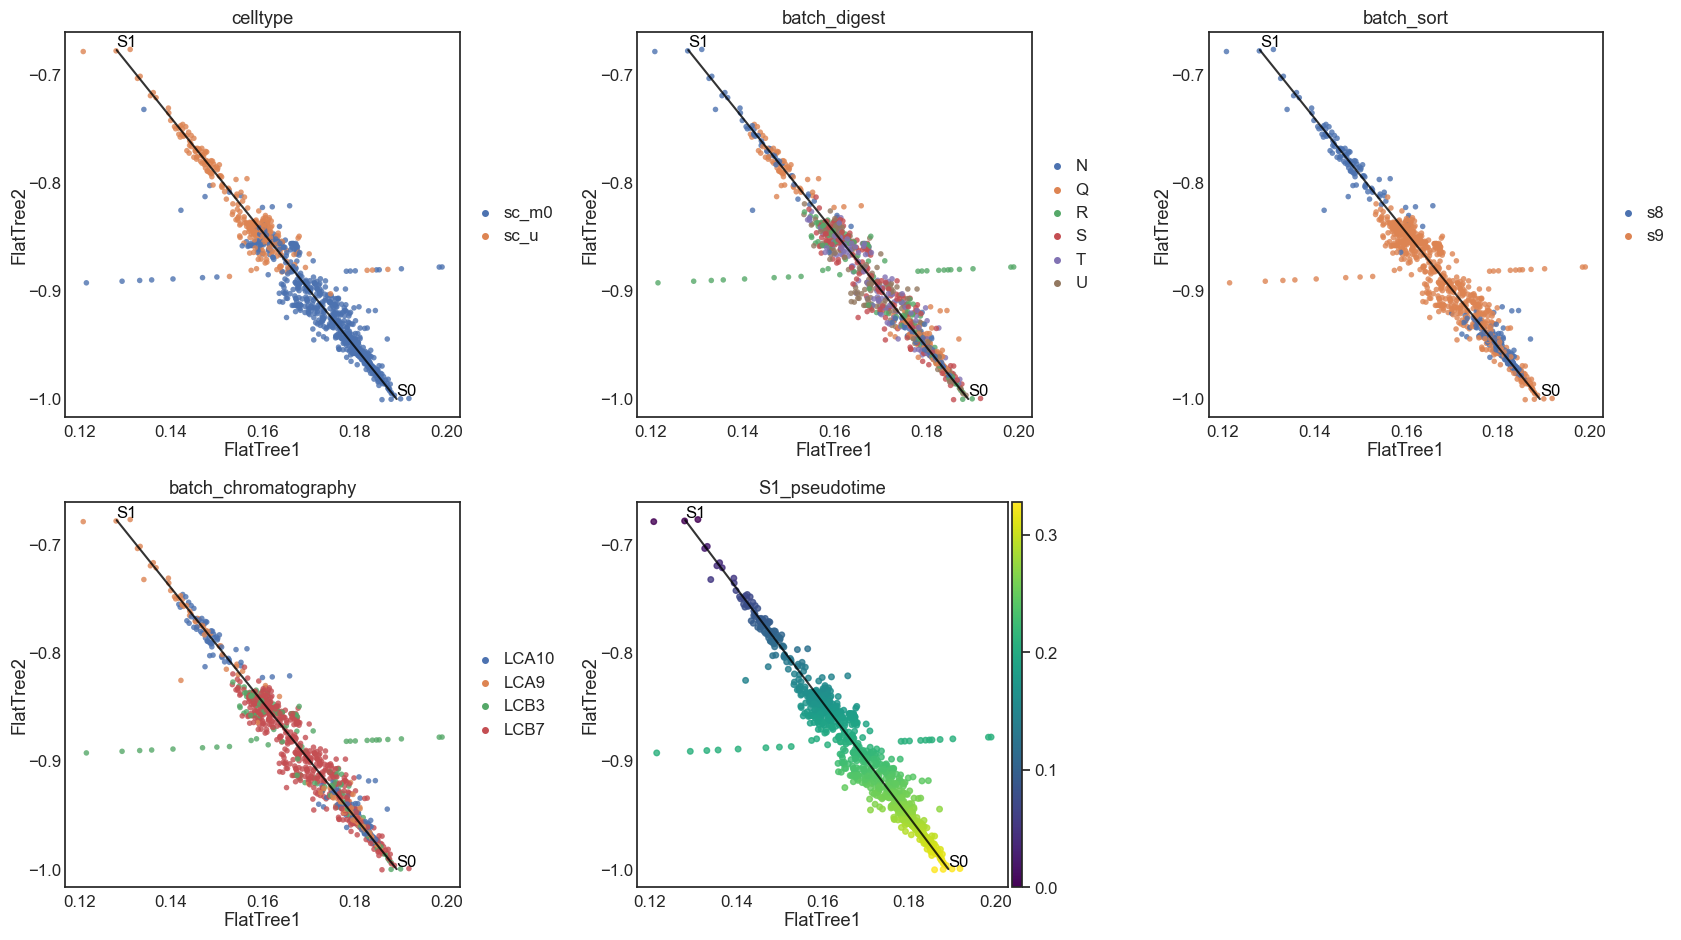

In [25]:
st.plot_flat_tree(adata,color=['celltype','batch_digest','batch_sort', 'batch_chromatography','S1_pseudotime'],
                  dist_scale=0.5,show_graph=True,show_text=True)

##### Stream plot at single cell 

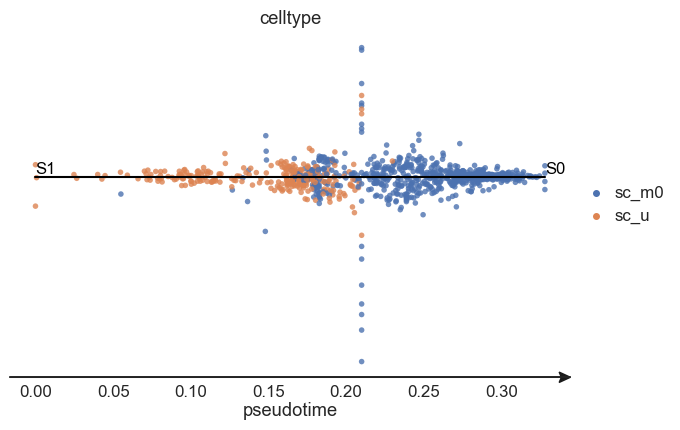

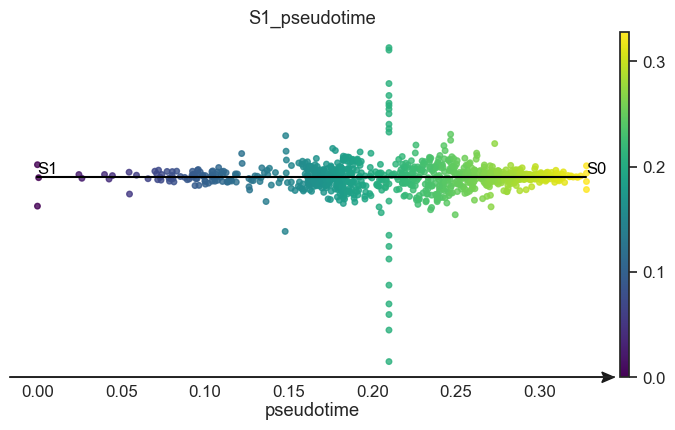

In [26]:
st.plot_stream_sc(adata,root='S1',color=['celltype','S1_pseudotime'],
                  dist_scale=0.3,show_graph=True,show_text=True)

##### stream plot

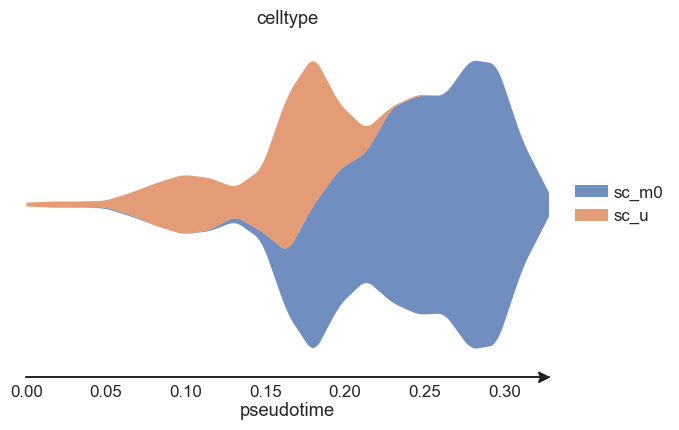

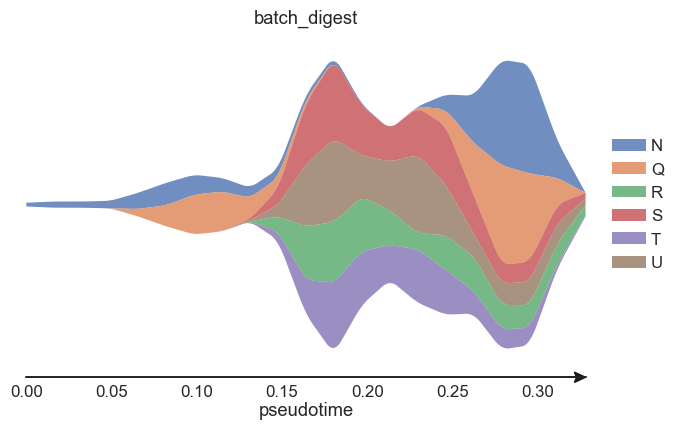

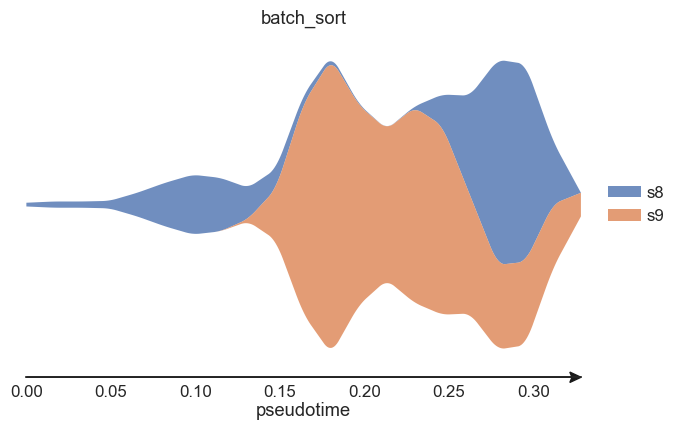

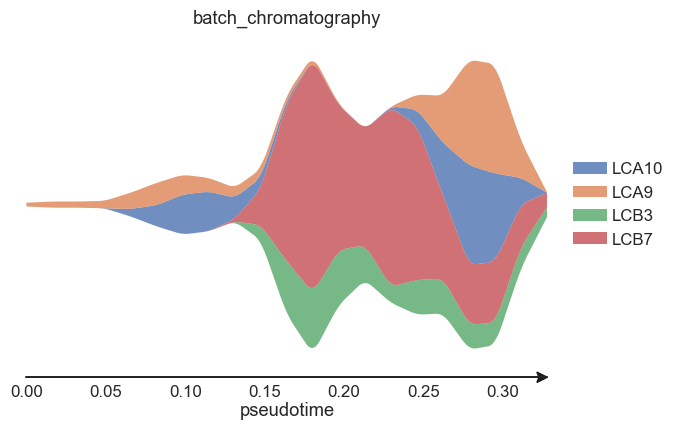

In [27]:
st.plot_stream(adata,root='S1',color=['celltype','batch_digest','batch_sort', 'batch_chromatography'])

### Marker genes detection

##### 1) detect marker genes for each leaf branch 

In [ ]:
#st.detect_leaf_markers(adata,marker_list=adata.uns['var_genes'],cutoff_zscore=1.0,
#                       cutoff_pvalue=0.01, root='S1',n_jobs=4)

In [ ]:
#adata.uns['leaf_markers_all'].head()

In [ ]:
#adata.uns['leaf_markers'][('S5','S3')].head()

In [ ]:
#st.plot_stream_sc(adata,root='S5',color=['O00763'],
#                  dist_scale=0.3,show_graph=True,show_text=True)

##### 2) detect transition genes for each branch

In [28]:
st.detect_transition_markers(adata,marker_list=adata.uns['var_genes'],cutoff_spearman=0.4,
                             cutoff_logfc=0.25, root='S1',n_jobs=4)

Scanning the specified marker list ...
Filtering out markers that are expressed in less than 5 cells ...
4 cpus are being used ...
2771 markers are being scanned ...


In [29]:
adata.uns['transition_markers'][('S1','S0')].head()

,stat,logfc,pval,qval
ARMCX5,-0.836307,1.878762,1.940072e-267,3.889845e-264
ANXA2,0.819783,1.848055,3.303541e-248,3.311800e-245
VIM,0.814947,2.033489,5.974423e-243,3.992906e-240
LMNA,0.808833,1.925272,1.606998e-236,8.055076e-234
SMIM22,-0.796243,1.776563,5.545167e-224,2.223612e-221


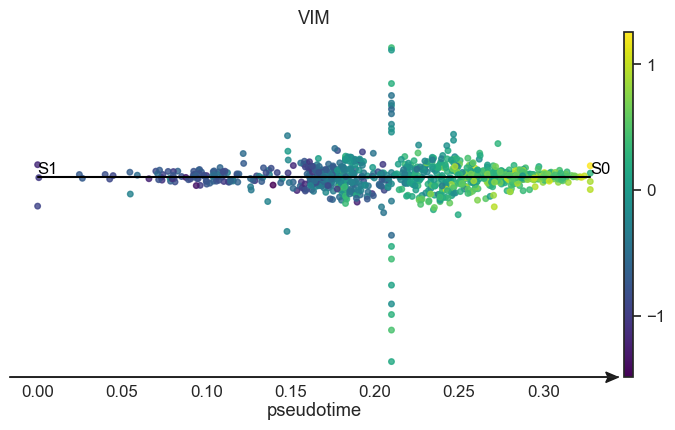

In [30]:
st.plot_stream_sc(adata,root='S1',color=['VIM'],
                  dist_scale=0.3,show_graph=True,show_text=True,save_fig=False,fig_format='pdf')

##### 3) detect marker genes that are differentially expressed between pairs of branches

In [ ]:
#st.detect_de_markers(adata,marker_list=adata.uns['var_genes'],cutoff_zscore=1,
#                     cutoff_logfc=0.25, root='S1',n_jobs=4)

In [ ]:
#adata.uns['de_markers_greater'][(('S3', 'S4'), ('S3', 'S0'))].head()

In [ ]:
#st.plot_de_markers(adata)

##### 4) detect cell population-specific markers

In [54]:
st.detect_markers(adata,ident='celltype',marker_list=adata.uns['var_genes'],cutoff_zscore=1.0,cutoff_pvalue=0.01)

Scanning the specified marker list ...
Importing precomputed scaled marker expression matrix ...
2771 markers are being scanned ...


In [55]:
adata.uns['markers_celltype']['sc_u'].head()

,zscore,H_statistic,H_pvalue,sc_m0
ANXA2,-1,533.025,6.20795e-118,5.12273e-166
ARMCX5,1,442.341,3.34952e-98,4.3652e-128
MYO9A,-1,441.213,5.89396e-98,1.18323e-127
SMIM22,1,425.22,1.78336e-94,1.33499e-121
ACACB,1,418.734,4.60212e-93,3.4171e-119


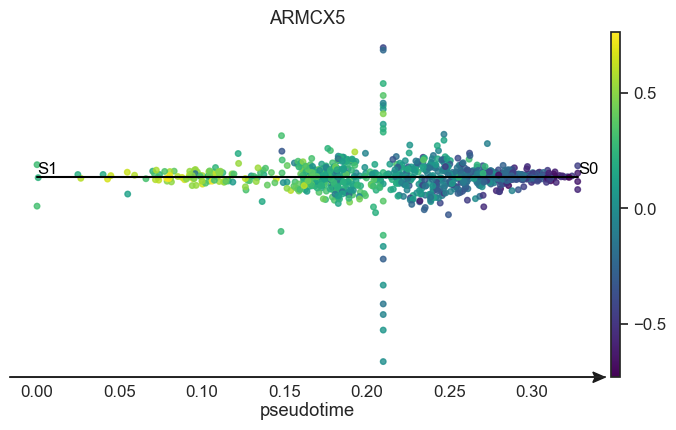

In [56]:
st.plot_stream_sc(adata,root='S1',color=['ARMCX5'],
                  dist_scale=0.3,show_graph=True,show_text=True)

In [57]:
adata.uns['markers_celltype']['sc_m0'].head()

,zscore,H_statistic,H_pvalue,sc_u
LMNA,1,452.371,2.19836e-100,5.62828e-132
KLHL36,-1,431.128,9.23481e-96,8.10958e-124
TIE1,-1,424.282,2.8535e-94,2.9877e-121
SQOR,1,421.199,1.33788e-93,4.18303e-120
CMYA5,1,414.443,3.95425e-92,1.29656e-117


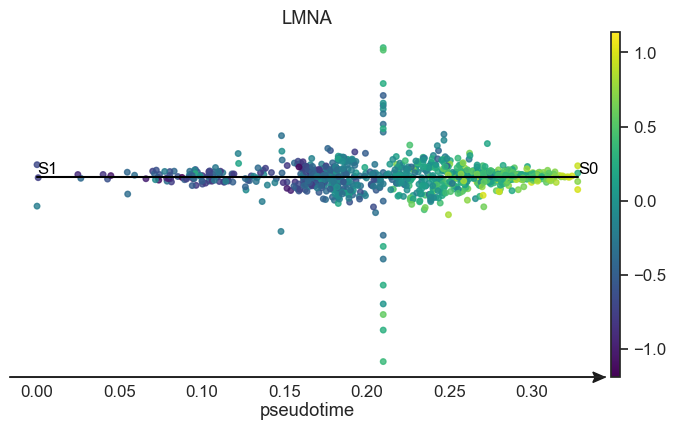

In [58]:
st.plot_stream_sc(adata,root='S1',color=['LMNA'],
                  dist_scale=0.3,show_graph=True,show_text=True)

## save results

In [ ]:
st.write(adata,file_name='stream_result_var.pkl')